In [1]:
# https://www.kaggle.com/rishianand/devanagari-character-set
from springyknn.springyknn import *

%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
data = pd.read_csv("devanagari-character-set/data.csv")

In [4]:
import numpy as np
characters = data['character'].unique()
character_to_id = {}
for index, char in enumerate(characters):
    character_to_id[char] = index
x_train = data.iloc[:,:1024].as_matrix()/255.0
y_train = np.asarray([character_to_id[char] for char in data['character']]).reshape(-1,1)
rndperm = np.random.permutation(x_train.shape[0])
x_train = x_train[rndperm]
y_train = y_train[rndperm]
print(x_train.shape)
print(y_train.shape)

(92000, 1024)
(92000, 1)


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
pca.fit(x_train[:20000])
cx_train = pca.transform(x_train)
cy_train = y_train
print('Explained total variation: ,', format(sum(pca.explained_variance_ratio_)))
print(cx_train.shape)

Explained total variation: , 0.9222585578587287
(92000, 128)


In [8]:
springyknn = SpringyKNN(cx_train, cy_train, randomize=True, num_pivots=10000)
G = springyknn.get_springy_knn_graph(k1=10, k2=10)
springyknn.write_gexf(G, filename='devanagari_springyknn_graph.gexf')

Started kNN of data on pivots...


  0%|          | 166/92000 [00:00<00:55, 1655.91it/s]

Finished kNN of data on pivots in  209.49549388885498  secs
Started spring strength computation between pivots...


100%|██████████| 92000/92000 [00:50<00:00, 1826.03it/s]


Finished spring strength computation in  50.3850998878479  secs
Started kNN graph computation from lil_matrix...


100%|██████████| 10000/10000 [00:01<00:00, 6820.89it/s]


Finished kNN graph of pivots in  8.154505014419556  secs
Preparing networkx graph...
Finished preparing networkx graph in  0.5903377532958984  secs
Saved gexf file


Preparing networkx visualization...
Computing circular layout positions...
Finished computing circular layout positions in  0.0023088455200195312  secs
Computing spring layout positions...
Finished computing spring layout positions in  483.443856716156  secs


<IPython.core.display.Javascript object>


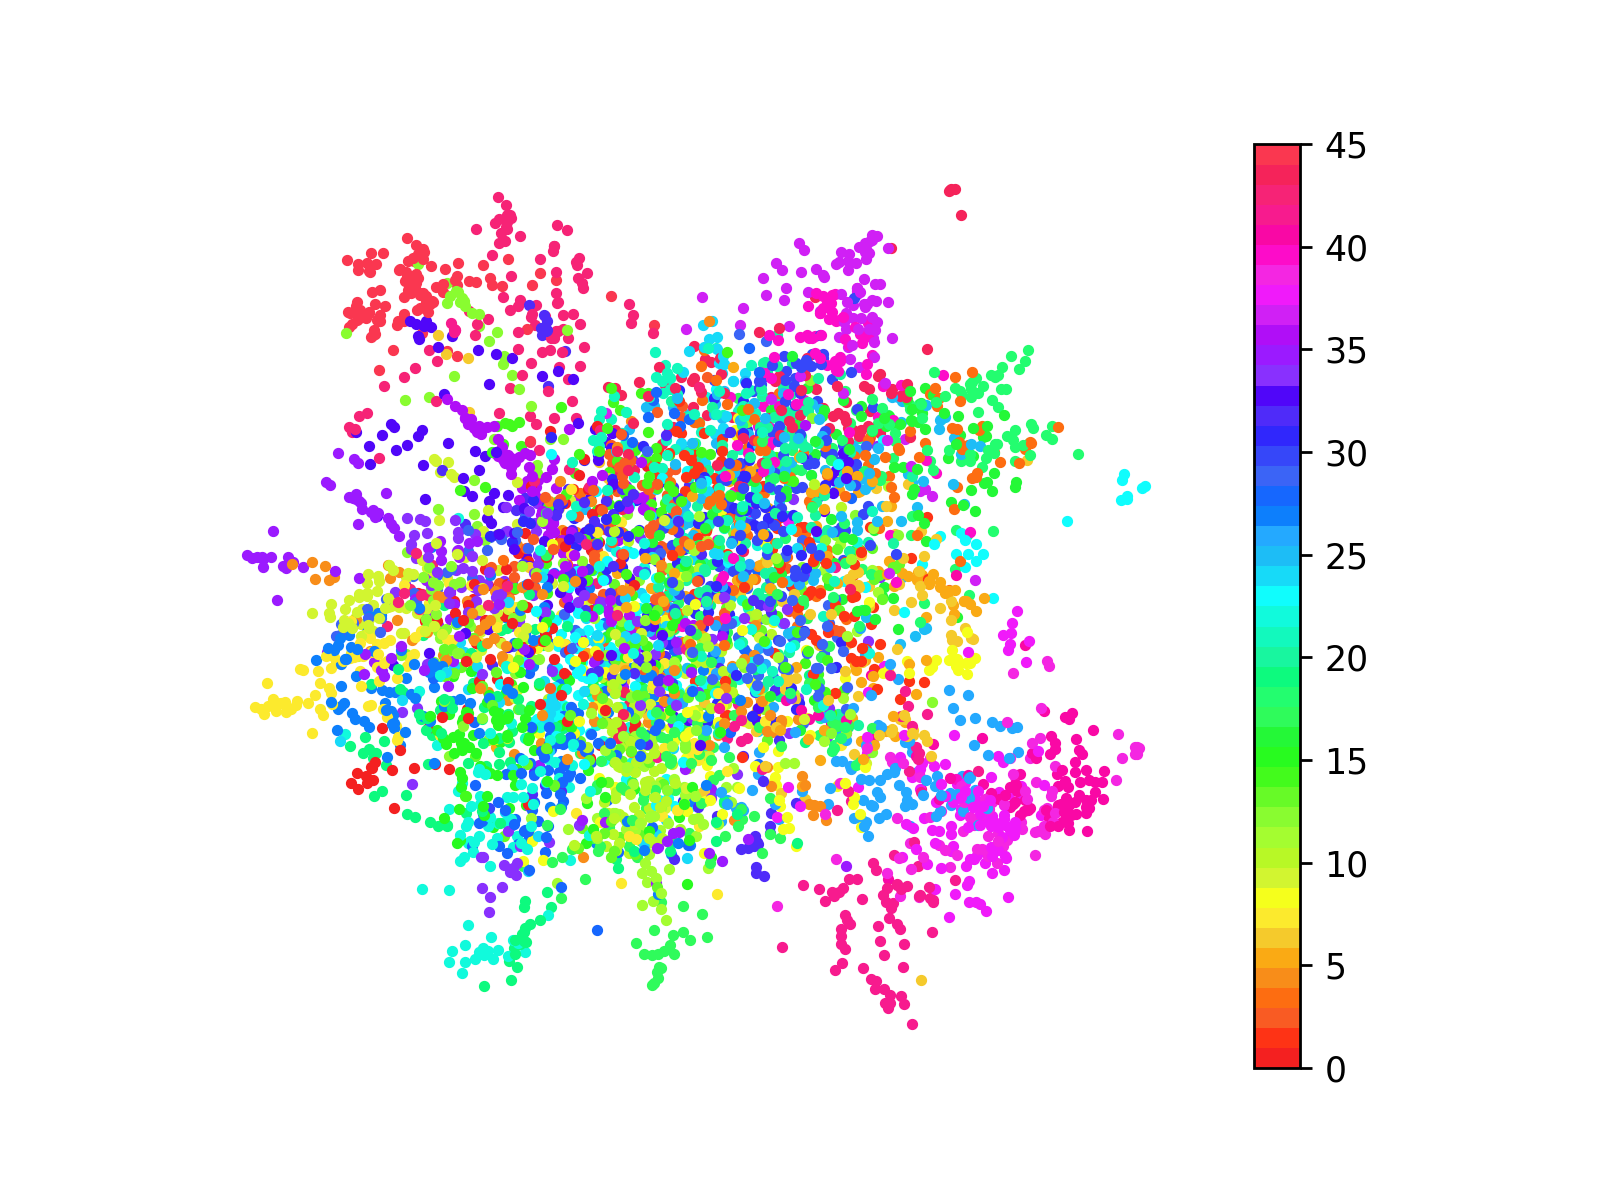

Finished networkx visualization in  502.59799790382385  secs


In [7]:
springyknn.viz_spring_graph(G, dim=2, iterations=150, scale=1.0)